# WeatherPy
----

### My Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv" # Converting raw data to CSV 

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generating Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Performing API Calls

In [18]:
print('''Beginning Data Retrieval     
-----------------------------''')

url = "http://api.openweathermap.org/data/2.5/weather?"
record_num = 0
set_num = 1
city_info = []

for city in cities:
    query_url = url + "appid=" + api_keys.api_key + "&q=" + city
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    if (weather_response.status_code == 200):
        record_num += 1
        latitude = weather_json["coord"]["lat"]
        temperature = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        city_info.append({"Name": city, "Latitude": latitude, "Temperature (F)": temperature, "Humidity (%)": humidity, 
                          "Cloudiness (%)": cloudiness, "Wind Speed (mph)": wind_speed})
        print(f"Processing Record {record_num} of Set {set_num} | {city}")
    
    else: 
        cities.remove(city)
        record_num = 0
        set_num += 1
        print("City not found. Skipping...")
        pass
    
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')

Beginning Data Retrieval     
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 2 | champerico
Processing Record 2 of Set 2 | punta arenas
Processing Record 3 of Set 2 | goure
Processing Record 4 of Set 2 | san patricio
Processing Record 5 of Set 2 | prainha
Processing Record 6 of Set 2 | arraial do cabo
Processing Record 7 of Set 2 | nanortalik
Processing Record 8 of Set 2 | ushuaia
Processing Record 9 of Set 2 | itarema
Processing Record 10 of Set 2 | comodoro rivadavia
Processing Record 11 of Set 2 | talnakh
Processing Record 12 of Set 2 | fort nelson
Processing Record 13 of Set 2 | albany
Processing Record 14 of Set 2 | upernavik
Processing Record 15 of Set 2 | bichura
Processing Record 16 of Set 2 | nyimba
Processing Record 17 of Set 2 | rikitea
Processing Record 18 of Set 2 | mount gambier
Processing Record 19 of Set 2 | lavrentiya
Processing Record 20 of Set 2 | iqaluit
Processing Record 21 of Set 2 | port alfred
Processing Record 22 of Set 2 |

Processing Record 12 of Set 19 | manama
Processing Record 13 of Set 19 | mwinilunga
City not found. Skipping...
Processing Record 1 of Set 20 | kosa
City not found. Skipping...
Processing Record 1 of Set 21 | tevaitoa
City not found. Skipping...
Processing Record 1 of Set 22 | rodrigues alves
Processing Record 2 of Set 22 | mayo
Processing Record 3 of Set 22 | la ronge
Processing Record 4 of Set 22 | spirit river
Processing Record 5 of Set 22 | olinda
Processing Record 6 of Set 22 | marsaxlokk
Processing Record 7 of Set 22 | norman wells
Processing Record 8 of Set 22 | lompoc
Processing Record 9 of Set 22 | cabo san lucas
Processing Record 10 of Set 22 | nizhniy kuranakh
Processing Record 11 of Set 22 | castro
Processing Record 12 of Set 22 | ribeira grande
Processing Record 13 of Set 22 | mattru
Processing Record 14 of Set 22 | ponta do sol
Processing Record 15 of Set 22 | walvis bay
Processing Record 16 of Set 22 | eldorado
Processing Record 17 of Set 22 | ardmore
Processing Record 1

Processing Record 2 of Set 43 | takapau
Processing Record 3 of Set 43 | thai binh
Processing Record 4 of Set 43 | sovetskiy
Processing Record 5 of Set 43 | trelew
City not found. Skipping...
Processing Record 1 of Set 44 | nioro
Processing Record 2 of Set 44 | ostrovnoy
Processing Record 3 of Set 44 | aykhal
Processing Record 4 of Set 44 | oistins
Processing Record 5 of Set 44 | gao
Processing Record 6 of Set 44 | tiznit
Processing Record 7 of Set 44 | sisimiut
City not found. Skipping...
Processing Record 1 of Set 45 | yulara
Processing Record 2 of Set 45 | zeya
Processing Record 3 of Set 45 | punta alta
Processing Record 4 of Set 45 | hwange
Processing Record 5 of Set 45 | ambon
Processing Record 6 of Set 45 | chuy
Processing Record 7 of Set 45 | ligayan
Processing Record 8 of Set 45 | cabo rojo
Processing Record 9 of Set 45 | catuday
City not found. Skipping...
Processing Record 1 of Set 46 | manzhouli
Processing Record 2 of Set 46 | tautira
Processing Record 3 of Set 46 | suntar
Pr

In [3]:
# Testing API Key 
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_keys.api_key + "&q=London"
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=London


### Converting Raw Data to DataFrame

In [19]:
# Create dataframe
weather_df = pd.DataFrame(city_info)

In [20]:
# Write to CSV 
weather_df.to_csv("Output/cities.csv")

In [35]:
# Display the top 5-10 values of the dataframe
weather_df.head(10)

,Cloudiness (%),Humidity (%),Latitude,Name,Temperature (F),Wind Speed (mph)
0,75,58,16.38,champerico,303.150,1.00
1,75,57,-53.16,punta arenas,282.150,7.70
2,20,47,13.98,goure,300.679,3.01
3,0,72,-26.98,san patricio,302.329,1.41
4,8,63,-1.80,prainha,304.229,1.91
5,75,94,-22.97,arraial do cabo,296.800,3.10
6,12,91,60.14,nanortalik,276.729,13.56
7,75,45,-54.81,ushuaia,282.150,6.20
8,0,60,-2.92,itarema,300.929,8.06
9,40,35,-45.87,comodoro rivadavia,294.150,5.70


In [54]:
# Filtering data to remove "outliers" (Values greater than 100%)
weather_df = weather_df[weather_df["Humidity (%)"] <= 100]
weather_df.head(10)

,Cloudiness (%),Humidity (%),Latitude,Name,Temperature (F),Wind Speed (mph)
0,75,58,16.38,champerico,303.150,1.00
1,75,57,-53.16,punta arenas,282.150,7.70
2,20,47,13.98,goure,300.679,3.01
3,0,72,-26.98,san patricio,302.329,1.41
4,8,63,-1.80,prainha,304.229,1.91


### Plotting the Data

#### Latitude vs. Temperature Plot

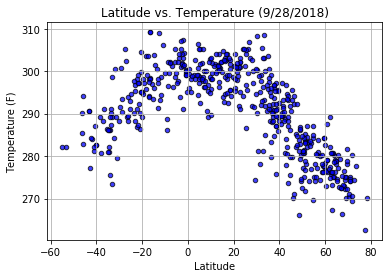

In [55]:
weather_df.plot.scatter(x = "Latitude", y = "Temperature (F)", color = "blue", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("Latitude vs. Temperature (9/28/2018)")
plt.savefig("Images/Latitude vs. Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

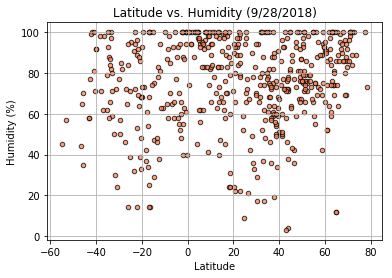

In [56]:
weather_df.plot.scatter(x = "Latitude", y = "Humidity (%)", color = "coral", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("Latitude vs. Humidity (9/28/2018)")
plt.savefig("Images/Latitude vs. Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

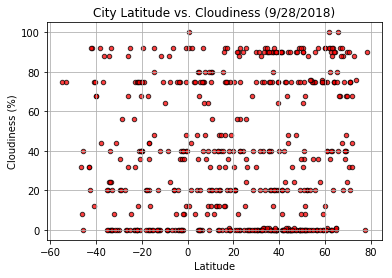

In [57]:
weather_df.plot.scatter(x = "Latitude", y = "Cloudiness (%)", color = "red", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("City Latitude vs. Cloudiness (9/28/2018)")
plt.savefig("Images/Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

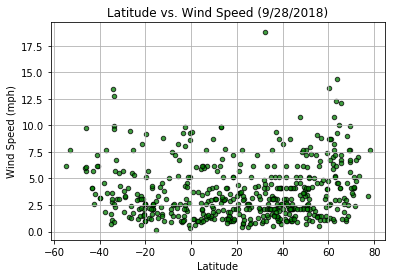

In [58]:
weather_df.plot.scatter(x = "Latitude", y = "Wind Speed (mph)", color = "green", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("Latitude vs. Wind Speed (9/28/2018)")
plt.savefig("Images/Latitude vs. Wind Speed.png")
plt.show()